### 0. Import generic libraries

In [27]:
import os
from pathlib import Path
from typing import Any, Dict, List, Tuple, Union
from tqdm import tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ase
import ase.io as ase_io
from ase import Atoms


In [22]:
os.chdir("C:/tmp/Molli") # set working directory to Molli top level

import ase_utils as au
#import gaussian_utils as GU
import metrics as ms
import utils as ut


### 1. Extracting info from Gaussian log files

#### Extract all details

In [ ]:
from gaussian_utils import process_many_log_files

gaussian_log_files = [
        Path("C:/tmp/molli_examples/gaussian_logs_1/ex0a_c7_gfn2_pbe1pbe_def2svpp_svpfit.log"),
        Path("C:/tmp/molli_examples/gaussian_logs_1/ex0a_c24_gfn2_pbe1pbe_def2svpp_svpfit.log"),
        Path("C:/tmp/molli_examples/gaussian_logs_1/ex0ff_c1_gfnff_pbe1pbe_def2svpp_svpfit.log"),
    ]

output_dir = Path("C:/tmp/molli_examples/gaussian_logs_1/molli_output")

aggregate_xyz_file = output_dir.joinpath("conformers.xyz")

process_many_log_files(
                    input_paths=gaussian_log_files,
                    output_dir=output_dir,
                    aggregate_log_file_name="aggregate_log.txt",
                    write_last_opt_steps_file_path=aggregate_xyz_file,
                )


#### Extract only summary

In [ ]:
from gaussian_utils import process_many_log_files

gaussian_log_files = [
        Path("C:/tmp/molli_examples/gaussian_logs_1/ex0a_c7_gfn2_pbe1pbe_def2svpp_svpfit.log"),
        Path("C:/tmp/molli_examples/gaussian_logs_1/ex0a_c24_gfn2_pbe1pbe_def2svpp_svpfit.log"),
        Path("C:/tmp/molli_examples/gaussian_logs_1/ex0ff_c1_gfnff_pbe1pbe_def2svpp_svpfit.log"),
    ]

output_dir = Path("C:/tmp/molli_examples/gaussian_logs_1/molli_output_summary_only")

aggregate_xyz_file = output_dir.joinpath("conformers.xyz")

process_many_log_files(
                    input_paths=gaussian_log_files,
                    output_dir=output_dir,
                    aggregate_log_file_name="aggregate_log.txt",
                    write_last_opt_steps_file_path=aggregate_xyz_file,
                    do_only_summary=True
                )


### 2. Features Analysis of Molecules

In [5]:
os.chdir("C:/tmp/Molli") # set working directory to Molli top level

import ase_utils as au
import features as ft
import molecule_analyzer as A
from target_molecule import TargetMolecule as tm

#### Load "original" molecule, acts as a reference molecule for getting information.

In [6]:
mol_original = ase_io.read(filename=Path("C:/tmp/gaussian/workflow/data/conformers/original.xyz"))

#### Load conformers generated by CREST GFN2-xTB from xyz-files.

In [7]:
mols_ex0_gfn2 = au.create_ase_atoms_list_from_xyz_files(
                input_paths=[
                    Path("C:/tmp/gaussian/workflow/data/conformers/crest_gfn2/ex0a_gfn2_crestconfs.xyz"),
                    Path("C:/tmp/gaussian/workflow/data/conformers/crest_gfn2/ex0b_gfn2_crestconfs.xyz"),
                ]
            )

len(mols_ex0_gfn2)

68

#### Create features list that we are investigating.

In [8]:
angles_TiOC = ft.create_angles(
                    atom_idxs=tm.angles_TiOC,
                    mol=mol_original
                    )

angles_TiOTi = ft.create_angles(
                    atom_idxs=tm.angles_TiOTi,
                    mol=mol_original
                    )

dihedrals_OCCO = ft.create_dihedrals(
                    atom_idxs=tm.dihedrals_OCCO,
                    mol=mol_original
                    )
all_features = angles_TiOC + angles_TiOTi + dihedrals_OCCO
len(all_features)

19

#### Calculate all features for all molecules and return results as Pandas DataFrame.

In [9]:
df_ex0_gfn2 = A.analyze_by_features_to_dataframe(
            molecules=mols_ex0_gfn2,
            features_list=all_features
        )

df_ex0_gfn2[:3]

,mol_names,Angle Ti(7)-O(6)-C(4),Angle Ti(7)-O(20)-C(18),Angle Ti(7)-O(31)-C(29),Angle Ti(7)-O(60)-C(53),Angle Ti(61)-O(56)-C(48),Angle Ti(61)-O(59)-C(54),Angle Ti(61)-O(60)-C(53),Angle Ti(61)-O(68)-C(72),Angle Ti(7)-O(8)-C(10),Angle Ti(7)-O(8)-Ti(61),Angle Ti(7)-O(60)-Ti(61),Dihedral O(6)-C(4)-C(3)-O(2),Dihedral O(8)-C(10)-C(11)-O(12),Dihedral O(59)-C(54)-C(62)-O(66),Dihedral O(60)-C(53)-C(42)-O(45),Dihedral O(12)-C(11)-C(3)-C(79),Dihedral O(45)-C(42)-O(38)-C(37),Dihedral O(2)-C(3)-O(1)-C(83),Dihedral O(65)-C(62)-O(66)-C(33)
0,ex0a_gfn2_crestconfs_1,108.408354,131.202147,129.067155,119.084795,133.933916,117.067338,89.380297,130.132894,111.157335,109.147671,99.721150,22.672954,162.148220,23.764684,57.615753,157.237760,354.641639,6.479932,221.722927
1,ex0a_gfn2_crestconfs_2,108.200779,131.049456,130.122016,119.181737,139.642696,118.219915,90.598300,130.273167,109.769229,106.375767,100.420096,22.630910,173.578177,23.415926,57.043692,137.133944,353.301978,5.222605,222.655217
2,ex0a_gfn2_crestconfs_3,108.472254,130.337212,128.600648,119.146988,134.248259,117.013710,89.114448,130.360107,111.311798,109.340056,99.097082,24.057947,160.820854,23.236920,57.692535,159.263173,354.309923,6.191933,222.241941


#### Select columns to plot

In [11]:
cols_to_plot = list(df_ex0_gfn2.columns)[1:]
cols_to_plot

['Angle Ti(7)-O(6)-C(4)',
 'Angle Ti(7)-O(20)-C(18)',
 'Angle Ti(7)-O(31)-C(29)',
 'Angle Ti(7)-O(60)-C(53)',
 'Angle Ti(61)-O(56)-C(48)',
 'Angle Ti(61)-O(59)-C(54)',
 'Angle Ti(61)-O(60)-C(53)',
 'Angle Ti(61)-O(68)-C(72)',
 'Angle Ti(7)-O(8)-C(10)',
 'Angle Ti(7)-O(8)-Ti(61)',
 'Angle Ti(7)-O(60)-Ti(61)',
 'Dihedral O(6)-C(4)-C(3)-O(2)',
 'Dihedral O(8)-C(10)-C(11)-O(12)',
 'Dihedral O(59)-C(54)-C(62)-O(66)',
 'Dihedral O(60)-C(53)-C(42)-O(45)',
 'Dihedral O(12)-C(11)-C(3)-C(79)',
 'Dihedral O(45)-C(42)-O(38)-C(37)',
 'Dihedral O(2)-C(3)-O(1)-C(83)',
 'Dihedral O(65)-C(62)-O(66)-C(33)']

#### Plot histograms of angles

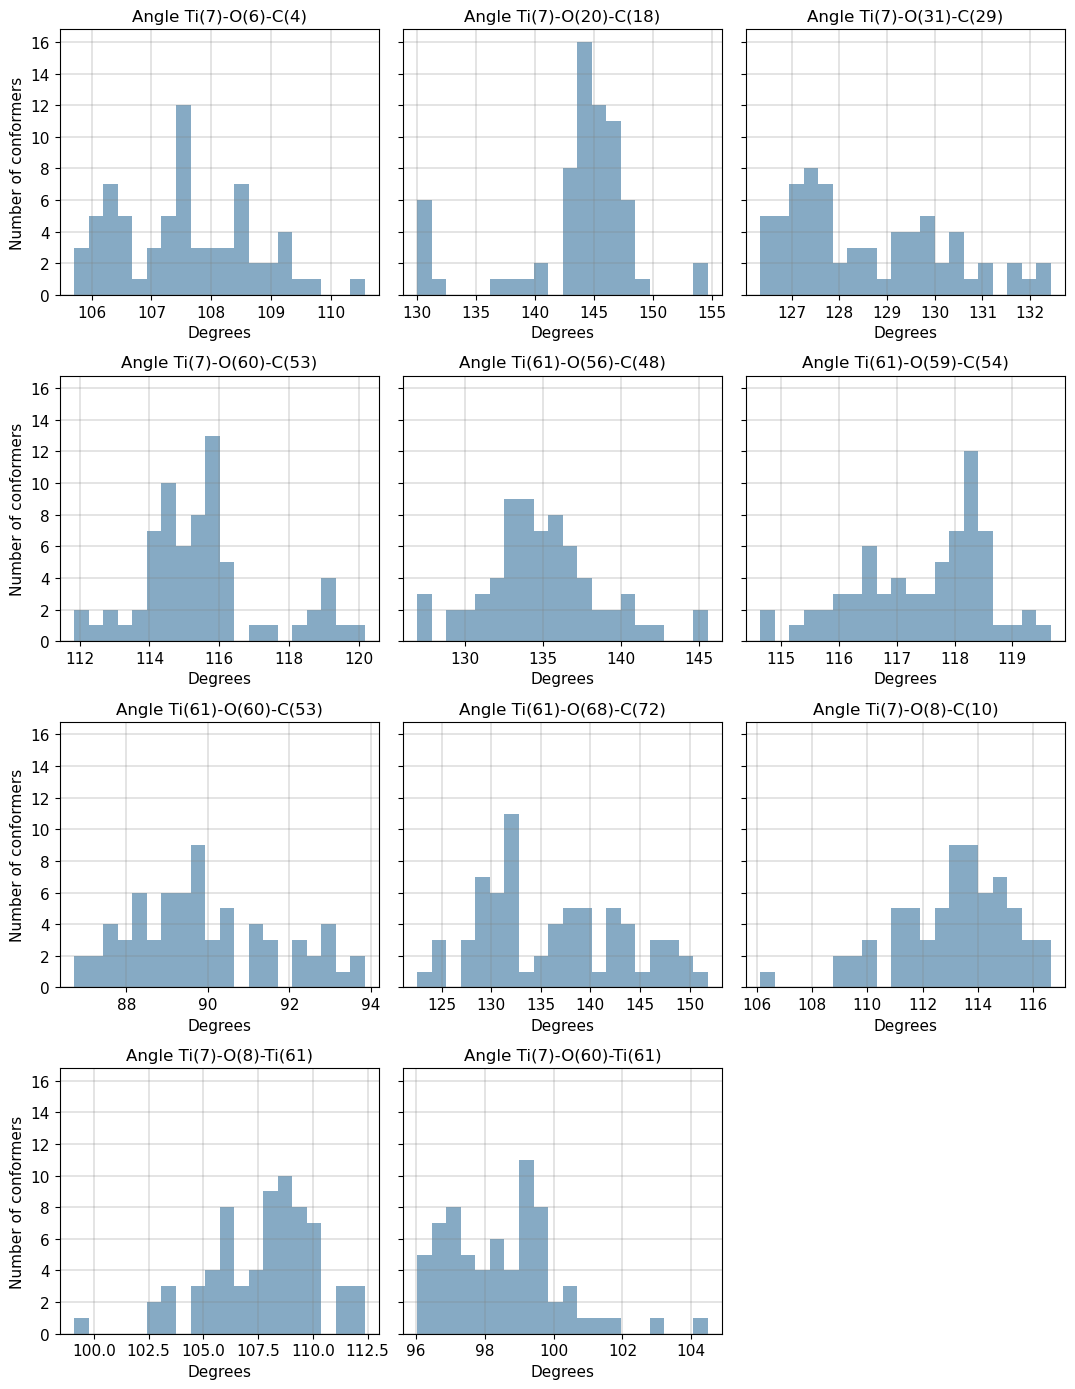

In [15]:
font_size = 11

axs = df_ex0_gfn2.hist(
        column=[col for col in cols_to_plot if "angle" in col.lower()],
        layout=(4, 3),
        figsize=(11, 14),
        bins=20,
        xlabelsize=font_size,
        ylabelsize=font_size,
        sharey=True,
#        color="steelblue",
        color = mpl.colormaps["twilight"].colors[75],    
    )

for ax in axs.flatten():
    ax.set_xlabel("Degrees", size=font_size)
    ax.set_ylabel("Number of conformers", size=font_size)
    ax.grid(color="grey", linewidth=0.3)

plt.tight_layout()

#### Plot histograms of dihedrals

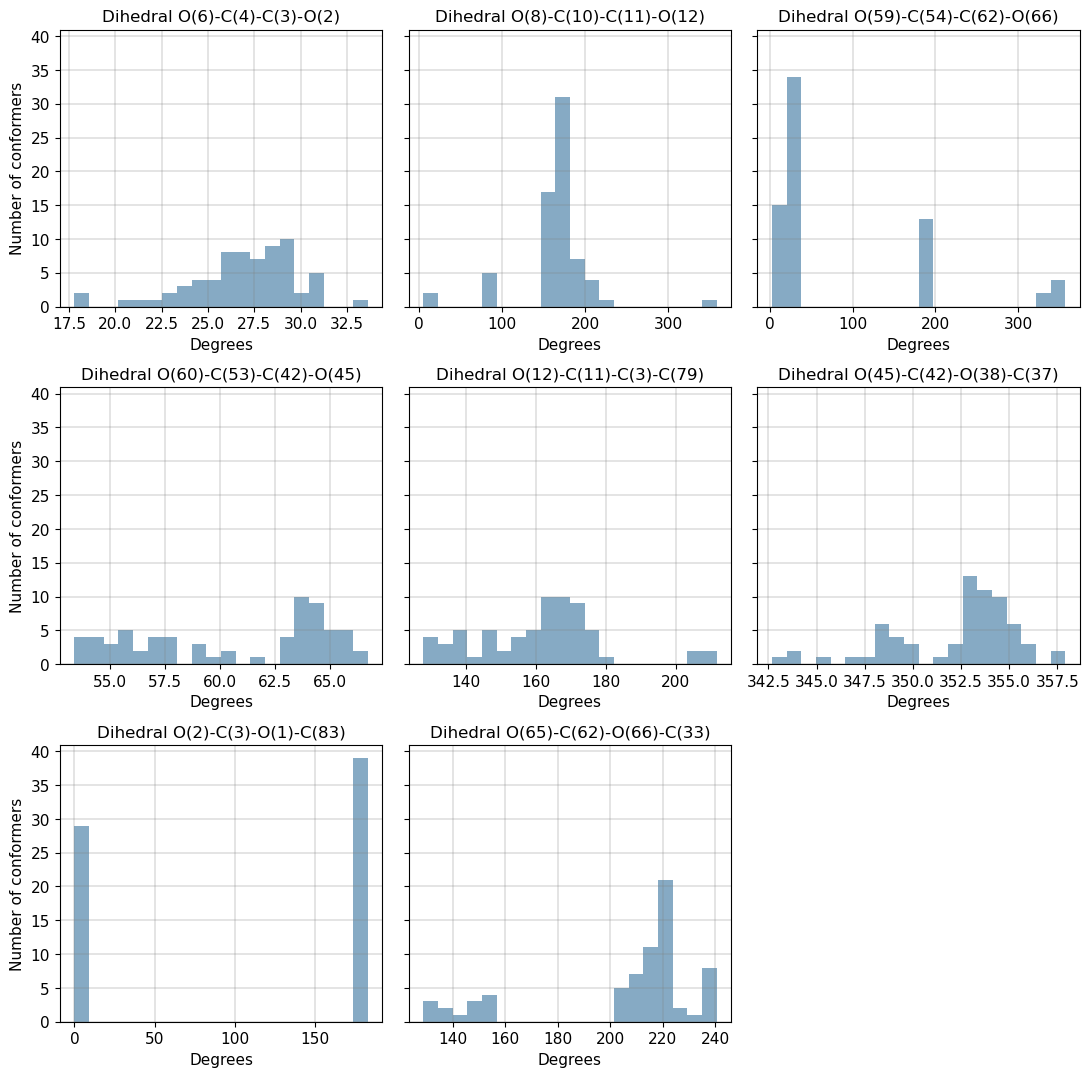

In [16]:
font_size = 11

axs = df_ex0_gfn2.hist(
        column=[col for col in cols_to_plot if "dihedral" in col.lower()],
        layout=(4, 3),
        figsize=(11, 14),
        bins=20,
        xlabelsize=font_size,
        ylabelsize=font_size,
        sharey=True,
#        color="steelblue",
        color = mpl.colormaps["twilight"].colors[75],    
    )

for ax in axs.flatten():
    ax.set_xlabel("Degrees", size=font_size)
    ax.set_ylabel("Number of conformers", size=font_size)
    ax.grid(color="grey", linewidth=0.3)

plt.tight_layout()


### 3. Optimization Trajectory Analysis

In [18]:
from file_source import MultiItemFileSource
from trajectory_analyzer import TrajectoryAnalyzer

#### Define metrics by which we compare molecules

In [23]:
metric_funcs = [
  (ms.mad_of_positions, "mean_abs_dist"),
  (ms.rmsd_of_positions, "root_mean_of_sq_dist"),
  (ms.max_distance, "max_dist"),
]


#### Create TrajectoryAnalyzers: select points from trajectories and calculate metrics

In [25]:
# num_steps means how many datapoints we are selecting from a trajectory.
# in order to compare trajectories, we take linearly num_step points from a trajectory.
# It is not ideal comparison, but still gives the idea how trajectories compare proportionately.

num_steps = 10

###############################################################################
# mol24_ex16_crest5
###############################################################################

base_trajectory = MultiItemFileSource(
    file_path=Path("C:/tmp/molli_examples/optimization_trajectories/ex16_c5/ex16_c5_pbe1pbe_cc_pvtz_tzvpfit.xyz"),
    name="base traj",
    item_idxs=num_steps
    )

trajectories_to_compare = [
        MultiItemFileSource(
        file_path=Path("C:/tmp/molli_examples/optimization_trajectories/ex16_c5/ex16_c5_pbe1pbedef2svpp_step10_pbe1pbe_cc_pvtz_tzvpfit.xyz"),
        name="pre optimized 10-steps",
        item_idxs=num_steps
        )
    ]
description = "ex16_c5"

ex16_c5_traj_analyzer = TrajectoryAnalyzer(
                            description=description,
                            base_trajectory=base_trajectory,
                            trajectories_to_compare=trajectories_to_compare,
                            metric_functions=metric_funcs,
                          )

###############################################################################
# ex0a_c10
###############################################################################

base_trajectory = MultiItemFileSource(
    file_path=Path("C:/tmp/molli_examples/optimization_trajectories/ex0a_c10/ex0a_c10_pbe1pbe_cc_pvtz_tzvpfit.xyz"),
    name="base traj",
    item_idxs=num_steps
    )

trajectories_to_compare = [
        MultiItemFileSource(
        file_path=Path("C:/tmp/molli_examples/optimization_trajectories/ex0a_c10/ex0a_c10_bp86def2svpp_step10_pbe1pbe_cc_pvtz_tzvpfit.xyz"),
        name="pre optimized 10-steps",
        item_idxs=num_steps
        )
    ]
description = "ex0a_c10"

ex0a_c10_traj_analyzer = TrajectoryAnalyzer(
                            description=description,
                            base_trajectory=base_trajectory,
                            trajectories_to_compare=trajectories_to_compare,
                            metric_functions=metric_funcs,
                          )


#### Plot comparison of trajectories

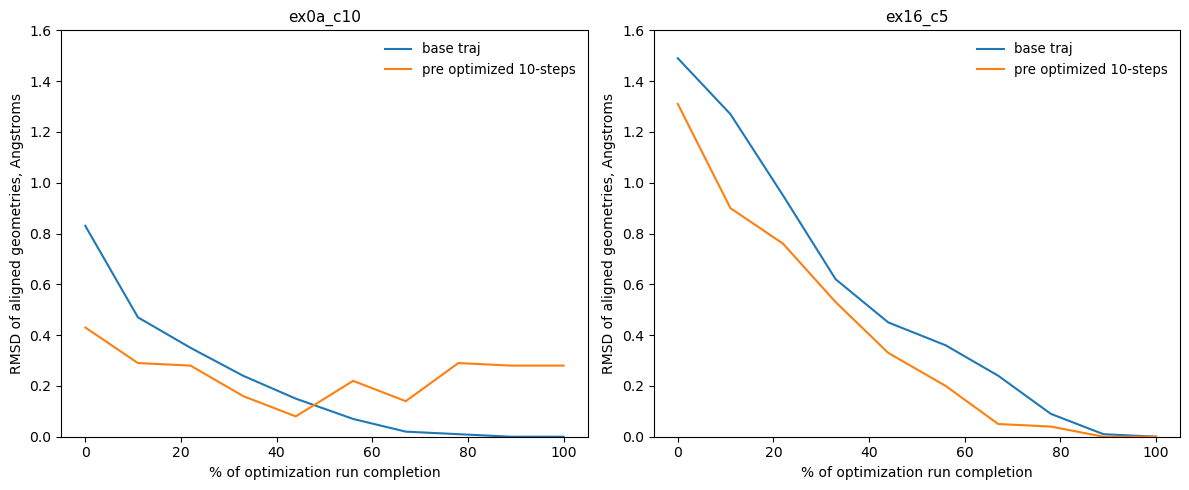

In [28]:
analyzers = [
    ex0a_c10_traj_analyzer,
    ex16_c5_traj_analyzer,
    ]

analyzer_names = [a.description for a in analyzers]

n = len(analyzer_names)
num_cols = 2
num_rows = n // num_cols if n % num_cols == 0 else n // num_cols + 1
figure_size = (num_cols * 6, num_rows * 5)

title = "Optimization trajectories comparison with pbe1pbe_cc_pvtz_tzvpfit"
x_label = "% of optimization run completion"
y_label = "RMSD of aligned geometries, Angstroms"
metric_key = "root_mean_of_sq_dist"

x = [round(100 * x / (num_steps - 1), 0) for x in range(num_steps)]

fig, axs = plt.subplots(num_rows, num_cols, figsize=figure_size)
for traj_analyzer, ax in zip(analyzers, axs.ravel()):
    y = np.round(traj_analyzer.metrics[metric_key]["base_to_last"], 2) # add base
    ax.plot(x, y, label=traj_analyzer.base_trajectory.name)

    for i, traj_to_compare in enumerate(traj_analyzer.trajectories_to_compare):
        y = np.round(traj_analyzer.metrics[metric_key]["to_base_last_step"][i], 2)
        ax.plot(x, y, label=traj_to_compare.name)

    ax.set_title(f"{traj_analyzer.description}", fontdict={"fontsize":11})
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(loc="upper right", ncol=1, edgecolor="white", fontsize=9.5, markerscale=1.75)
    ax.sharey=True
    ax.set_ylim(ymin=0, ymax=1.6)

plt.tight_layout()

### 4. ...

### 5. ...